# Decision Tree

---------

### Introduction

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [1]:
from sklearn import tree

In [2]:
%matplotlib inline

In [3]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [5]:
clf.predict([[2., 2.]])

array([1])

In [6]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, ..., K-1]) classification.

### Iris Tree

Using the Iris dataset, we can construct a tree as follows:

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [8]:
from sklearn.externals.six import StringIO 

In [9]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [10]:
import os

In [11]:
os.unlink('iris.dot')

In [12]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

ModuleNotFoundError: No module named 'pydot'

In [13]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

NameError: name 'pydot' is not defined

In [14]:
from IPython.display import Image
Image(filename='iris.png')

FileNotFoundError: [Errno 2] No such file or directory: 'iris.png'

In [15]:
clf.predict(iris.data[:1, :])

array([0])

In [16]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

--------------------

# Examples

### 1. Plot the decision surface of a decision tree on the iris dataset ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/tree))

----------------------

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#=======model================
from sklearn.tree import DecisionTreeClassifier
#======= data =================================
from sklearn.datasets import load_iris

 - Data and Parameter

In [2]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

 - Plot

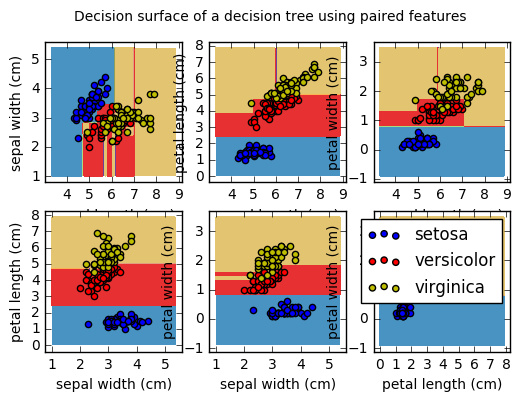

In [3]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


-------------------

### 2. Understanding the decision tree structure ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/tree))

--------------------

The decision tree structure can be analysed to gain further insight on the
relation between the features and the target to predict. In this example, we
show how to retrieve:

- the binary tree structure;
- the depth of each node and whether or not it's a leaf;
- the nodes that were reached by a sample using the ``decision_path`` method;
- the leaf that was reached by a sample using the apply method;
- the rules that were used to predict a sample;
- the decision path shared by a group of samples.

In [5]:
import numpy as np

#======= preprocessing& model selection============
from sklearn.model_selection import train_test_split

#======== model ================
from sklearn.tree import DecisionTreeClassifier

#========= data ==============
from sklearn.datasets import load_iris


In [7]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

* The decision estimator has an attribute called tree_  which stores the entire
tree structure and allows access to low level attributes. The binary tree
tree_ is represented as a number of parallel arrays. The i-th element of each
array holds information about the node `i`. Node 0 is the tree's root. NOTE:
Some of the arrays only apply to either leaves or split nodes, resp. In this
case the values of nodes of the other type are arbitrary!*

Among those arrays, we have:
   - left_child, id of the left child of the node
   - right_child, id of the right child of the node
   - feature, feature used for splitting the node
   - threshold, threshold value at the node

 Using those arrays, we can parse the tree structure:

In [10]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

The tree structure can be traversed to compute various properties such
as the depth of each node and whether or not it is a leaf.

In [11]:
node_depth = np.zeros(shape=n_nodes)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)

The binary tree structure has 5 nodes and has the following tree structure:


In [12]:
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %ss else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

node=0 test node: go to node 1 if X[:, 3] <= 0.800000011921s else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 2] <= 4.94999980927s else to node 4.
		node=3 leaf node.
		node=4 leaf node.



/Users/dibakarsigdel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dibakarsigdel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


* First let's retrieve the decision path of each sample. The decision_path
method allows to retrieve the node indicator functions. A non zero element of
indicator matrix at the position (i, j) indicates that the sample i goes
through the node j.

In [13]:
node_indicator = estimator.decision_path(X_test)

* Similarly, we can also have the leaves ids reached by each sample.

In [14]:
leave_id = estimator.apply(X_test)

* Now, it's possible to get the tests that were used to predict a sample or
a group of samples. First, let's make it for the sample.

In [15]:
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[i, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))


Rules used to predict sample 0: 
decision id node 4 : (X[0, -2] (= 1.5) > -2.0)

The following samples [0, 1] share the node [0 2] in the tree
It is 40.0 % of all nodes.


---------

### 3. Decision Tree Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/tree))

---------------

In [40]:
"""
===================================================================
Decision Tree Regression
===================================================================

A 1D regression with decision tree.

The :ref:`decision trees <tree>` is
used to fit a sine curve with addition noisy observation. As a result, it
learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.
"""
# print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

- Data

In [41]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Model

In [42]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

 - Predict

In [43]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

 - Plot

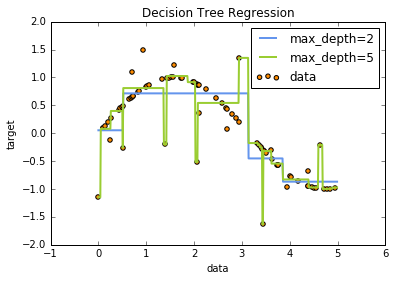

In [44]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

-----------------

### 4. Multi-output Decision Tree Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/tree))

-----------------

An example to illustrate multi-output regression with decision tree.

The decision trees is used to predict simultaneously the noisy x and y observations of a circle
given a single underlying feature. As a result, it learns local linear
regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

- Data: Create a random dataset

In [17]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

- Model: Fit regression model

In [18]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

 - Predict

In [20]:
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

- Plot

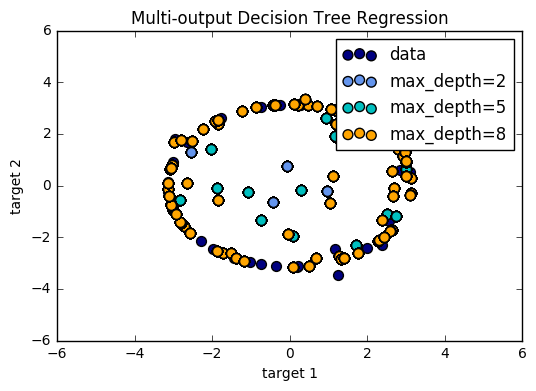

In [21]:
plt.figure()
s = 50
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="c", s=s, label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()
plt.show()